In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Diamonds Prices2022.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53943, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


#### Checking Null Values

In [5]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

#### Renaming Column Name

In [6]:
df.rename(columns={'Unnamed: 0':'number'}, inplace=True)

In [7]:
df.head(2)

,number,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


#### Setting Index

In [8]:
df.set_index('number', inplace=True)

In [9]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [10]:
df.shape

(53943, 10)

## Exploratory Data Analysis

#### 1. price column

In [11]:
df['price'].describe()

count    53943.000000
mean      3932.734294
std       3989.338447
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.000000
max      18823.000000
Name: price, dtype: float64

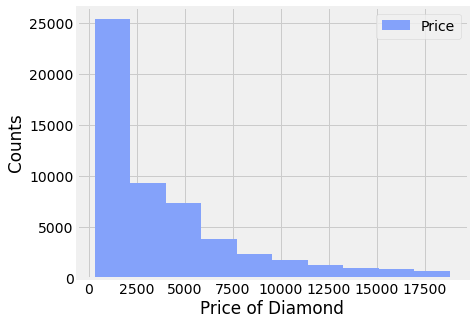

In [12]:
# Using Matplotlib
plt.figure(figsize=(7,5))
plt.style.use('fivethirtyeight')

df['price'].plot(kind='hist', color='#84a2fa', label = 'Price')
#df['price'].plot(kind='kde', color='#84a2fa', label = 'Price')

plt.xlabel('Price of Diamond')
plt.ylabel('Counts')
plt.legend()

<Figure size 720x504 with 0 Axes>

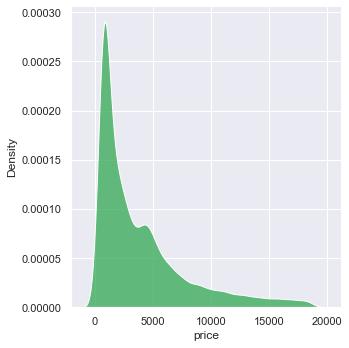

In [13]:
# Using Seaborn
plt.figure(figsize=(10,7))
sns.set_theme(style= 'darkgrid')
sns.displot(data = df, x='price', kind='kde',color='#32a852', multiple='stack')

<AxesSubplot:>

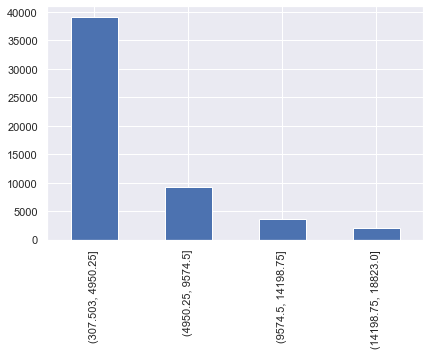

In [14]:
pd.cut(df['price'], bins=4).value_counts().sort_index().plot(kind='bar')

In [15]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


#### 2. carat column

In [16]:
df['carat'].describe()

count    53943.000000
mean         0.797935
std          0.473999
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

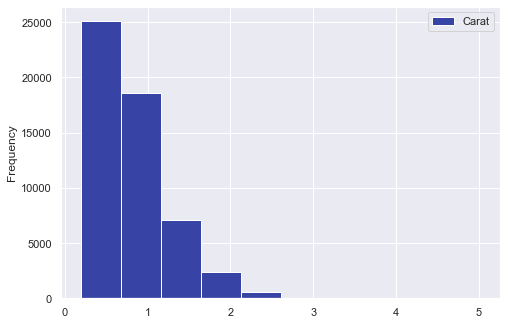

In [17]:
# using matplotlib
plt.figure(figsize=(7,5))
df['carat'].plot(kind='hist',color='#3744a6', label='Carat')
#df['carat'].plot(kind= 'kde',color='#3744a6', label='Carat')
plt.legend()

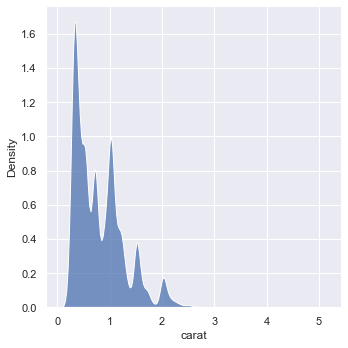

In [18]:
sns.displot(data= df, x='carat', kind='kde', multiple='stack')

#### 3. price and carat

In [19]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [20]:
# which carat of diamond has maximum price?
df.loc[df['price'].idxmax(),['carat','price']]

carat     2.29
price    18823
Name: 27750, dtype: object

<AxesSubplot:xlabel='carat', ylabel='price'>

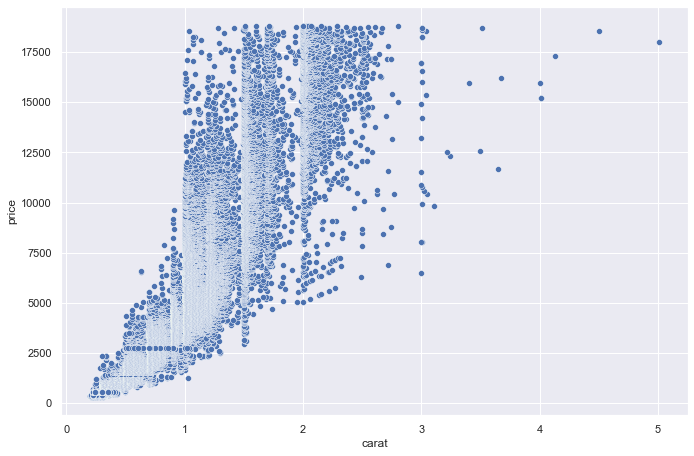

In [21]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = df, x= 'carat',y= 'price', )

In [22]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


#### 4. cut column

In [23]:
df['cut'].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

<AxesSubplot:xlabel='cut', ylabel='count'>

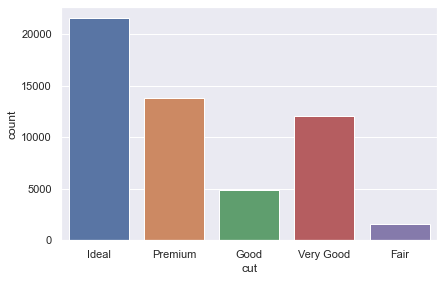

In [24]:
sns.countplot(x='cut', data=df)

<AxesSubplot:>

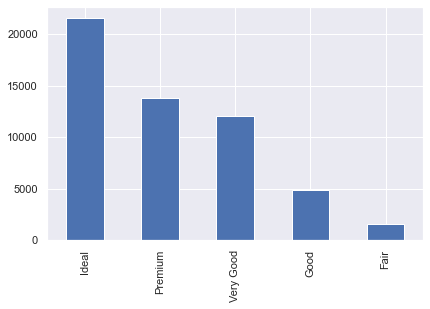

In [25]:
df['cut'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='cut'>

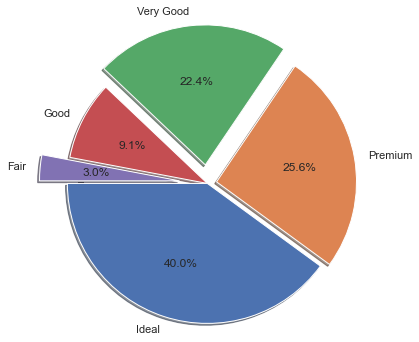

In [26]:
df['cut'].value_counts().plot(kind='pie', radius = 1.5, autopct = '%.1f%%', shadow = True, explode=[0,0.1,0.2,0, 0.3],
                       counterclock=True, startangle=180)

#### 5. price column and cut column

cut
Fair         AxesSubplot(0.08,0.07;0.87x0.81)
Good         AxesSubplot(0.08,0.07;0.87x0.81)
Ideal        AxesSubplot(0.08,0.07;0.87x0.81)
Premium      AxesSubplot(0.08,0.07;0.87x0.81)
Very Good    AxesSubplot(0.08,0.07;0.87x0.81)
Name: price, dtype: object

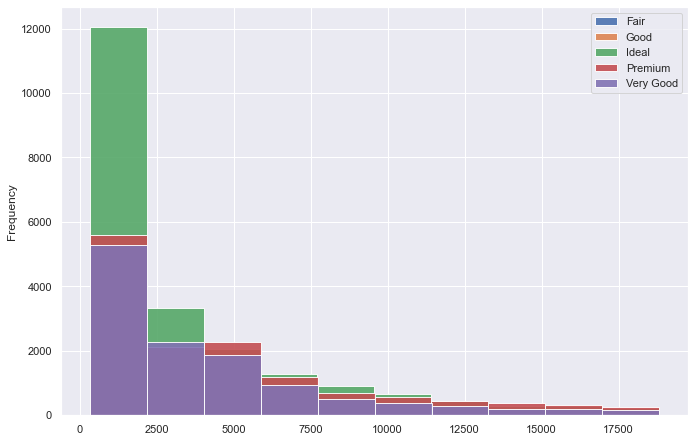

In [27]:
plt.figure(figsize=(10,7))
df.groupby('cut').price.plot(kind='hist', alpha=0.9, legend=True)

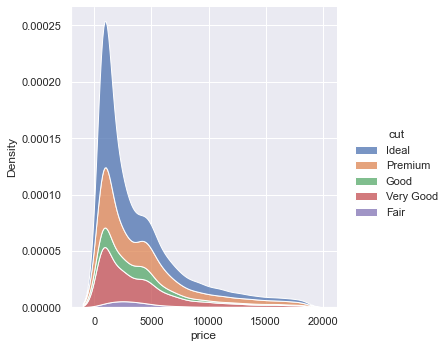

In [28]:
sns.displot(data=df, x='price', hue='cut', kind='kde', multiple='stack')

cut
Good       AxesSubplot(0.08,0.07;0.87x0.81)
Ideal      AxesSubplot(0.08,0.07;0.87x0.81)
Premium    AxesSubplot(0.08,0.07;0.87x0.81)
Name: price, dtype: object

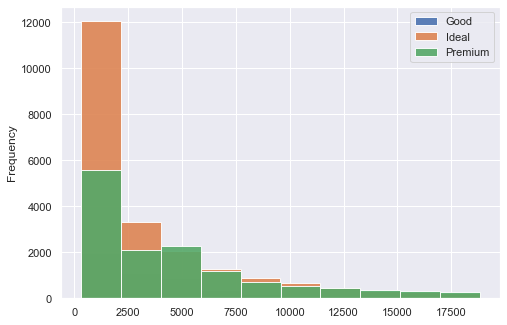

In [29]:
# Ploting price of respective cut types 'Ideal','Premium','Good'  
plt.figure(figsize=(7,5))
df[df['cut'].isin(['Ideal','Premium','Good'])].groupby('cut').price.plot(kind='hist', alpha= 0.9, legend=True)

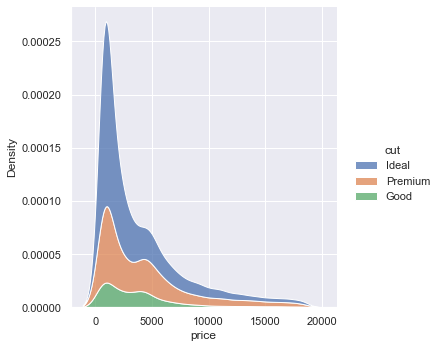

In [30]:
selected_cut = df[df['cut'].isin(['Ideal','Premium','Good'])]
selected_cut

sns.displot(data=selected_cut, x='price', hue='cut', kind='kde', multiple='stack')

In [31]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


#### 6. clarity column

In [32]:
df.groupby('clarity').size()

clarity
I1        741
IF       1790
SI1     13067
SI2      9194
VS1      8171
VS2     12259
VVS1     3655
VVS2     5066
dtype: int64

<AxesSubplot:xlabel='clarity', ylabel='count'>

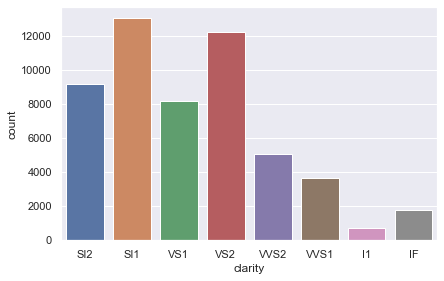

In [33]:
sns.countplot(data=df, x='clarity')

<AxesSubplot:>

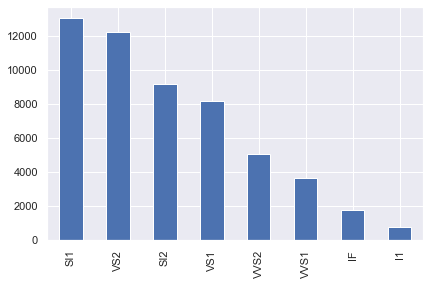

In [34]:
df['clarity'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='clarity'>

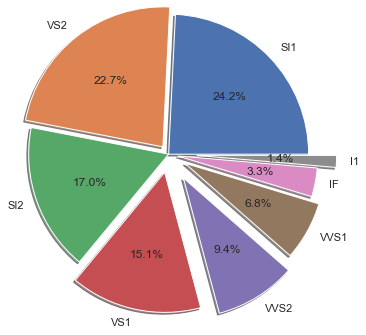

In [35]:
df['clarity'].value_counts().plot(kind='pie', radius= 1.5, autopct = '%.1f%%', shadow=True, 
                                  explode=[0,0.1,0,0.2, 0.3,0.2,0.1,0.3])

#### 7. price column and clarity column

clarity
I1      AxesSubplot(0.08,0.07;0.87x0.81)
IF      AxesSubplot(0.08,0.07;0.87x0.81)
SI1     AxesSubplot(0.08,0.07;0.87x0.81)
SI2     AxesSubplot(0.08,0.07;0.87x0.81)
VS1     AxesSubplot(0.08,0.07;0.87x0.81)
VS2     AxesSubplot(0.08,0.07;0.87x0.81)
VVS1    AxesSubplot(0.08,0.07;0.87x0.81)
VVS2    AxesSubplot(0.08,0.07;0.87x0.81)
Name: price, dtype: object

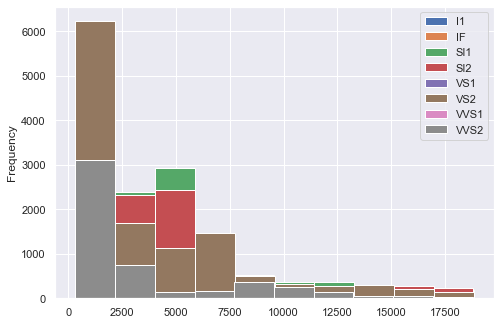

In [36]:
plt.figure(figsize=(7,5))
df.groupby('clarity').price.plot(kind='hist',alpha=1, legend=True)

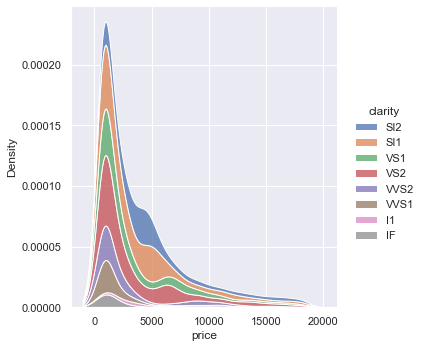

In [37]:
sns.displot(data=df, x='price',hue='clarity', kind='kde', multiple='stack')

In [38]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


#### 8. color column

In [39]:
df['color'].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<AxesSubplot:xlabel='color', ylabel='count'>

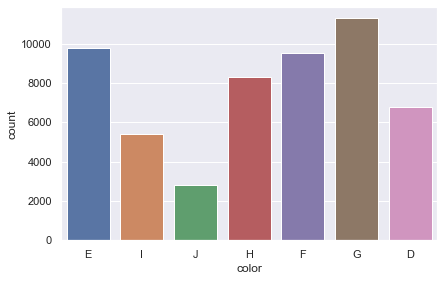

In [40]:
sns.countplot(data=df, x='color')

<AxesSubplot:>

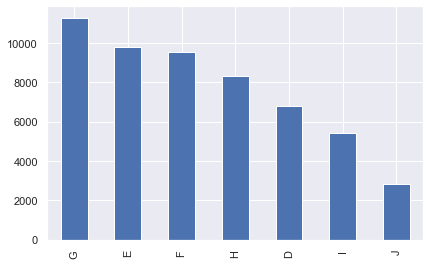

In [41]:
df['color'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='color'>

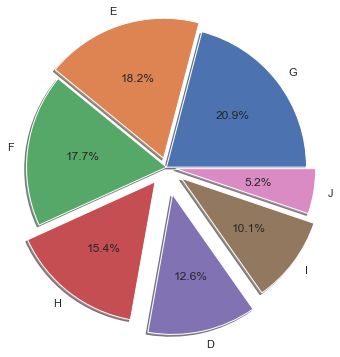

In [42]:
df['color'].value_counts().plot(kind='pie', radius= 1.5, autopct = '%.1f%%', shadow=True, 
                                  explode=[0,0.1,0,0.2, 0.3,0.2,0.1])

#### 9. price column vs color column

color
D    AxesSubplot(0.08,0.07;0.87x0.81)
E    AxesSubplot(0.08,0.07;0.87x0.81)
F    AxesSubplot(0.08,0.07;0.87x0.81)
G    AxesSubplot(0.08,0.07;0.87x0.81)
H    AxesSubplot(0.08,0.07;0.87x0.81)
I    AxesSubplot(0.08,0.07;0.87x0.81)
J    AxesSubplot(0.08,0.07;0.87x0.81)
Name: price, dtype: object

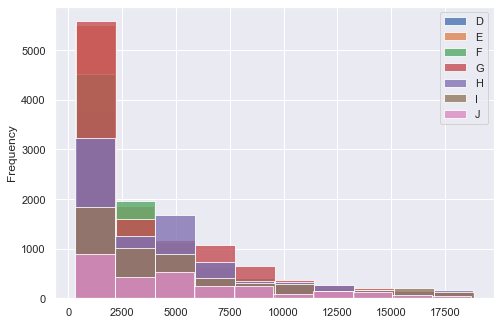

In [43]:
plt.figure(figsize=(7,5))
df.groupby('color').price.plot(kind='hist', alpha=0.8, legend=True)

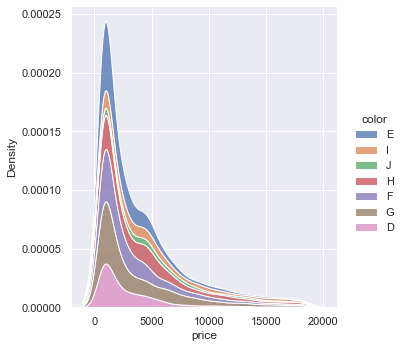

In [44]:

sns.displot(data= df, x= 'price', hue='color', kind='kde', multiple='stack')

In [45]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


#### 10. cut column and clarity column

<AxesSubplot:xlabel='clarity', ylabel='count'>

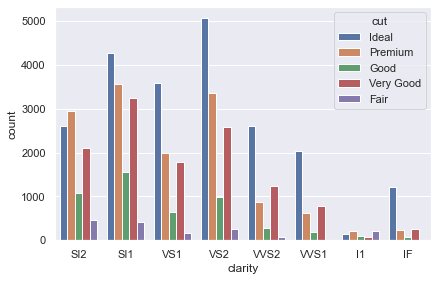

In [46]:
sns.countplot(data= df, x='clarity', hue='cut')

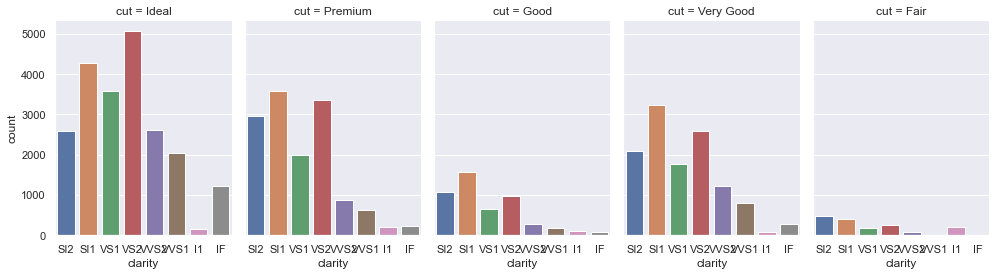

In [47]:
sns.catplot(data=df, x='clarity', col='cut',kind='count', height=4, aspect=.7)

In [48]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


#### 11. Relation among cut column, depth column and table column

In [49]:
df['depth'].describe()

count    53943.000000
mean        61.749322
std          1.432626
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

In [50]:
df['table'].describe()

count    53943.000000
mean        57.457251
std          2.234549
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [51]:
df['cut'].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [52]:
df[df['cut'].isin(['Ideal','Premium','Good'])].groupby('cut').depth.mean()

cut
Good       62.365879
Ideal      61.709401
Premium    61.264511
Name: depth, dtype: float64

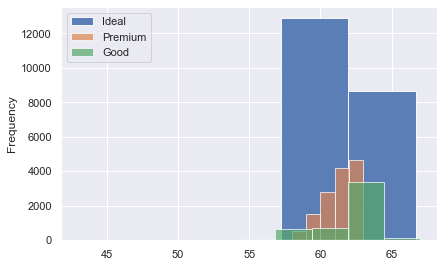

In [53]:
# 
df[df['cut'] == 'Ideal'].depth.plot(kind='hist', bins=5, alpha=0.9, label='Ideal')
df[df['cut']=='Premium'].depth.plot(kind='hist', bins=5, alpha=0.7, label='Premium')
df[df['cut']=='Good'].depth.plot(kind='hist', bins=5, alpha=0.7, label='Good')
plt.legend()

In [54]:
df[df['cut'].isin(['Ideal','Premium','Good'])].groupby('cut').table.mean()

cut
Good       58.694639
Ideal      55.951668
Premium    58.746060
Name: table, dtype: float64

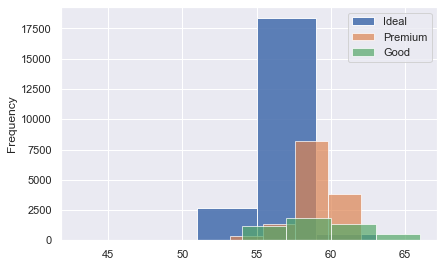

In [55]:
#
df[df['cut'] == 'Ideal'].table.plot(kind='hist', bins=5, alpha=0.9, label='Ideal')
df[df['cut']=='Premium'].table.plot(kind='hist', bins=5, alpha=0.7, label='Premium')
df[df['cut']=='Good'].table.plot(kind='hist', bins=5, alpha=0.7, label='Good')
plt.legend()

#### 12. depth column and table column and price column

<AxesSubplot:xlabel='depth', ylabel='price'>

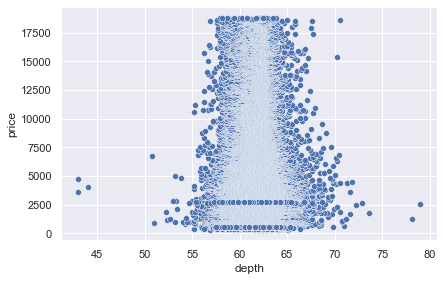

In [56]:
sns.scatterplot(data=df, x='depth', y='price')

<AxesSubplot:xlabel='depth', ylabel='price'>

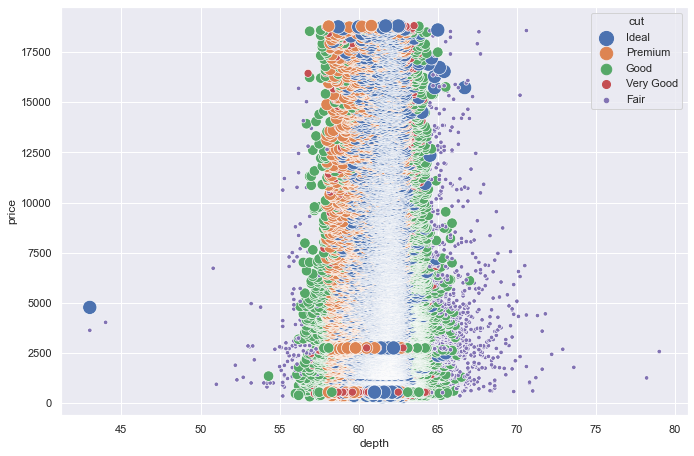

In [57]:
sns.set(rc={'figure.figsize':(10,7)})
sns.scatterplot(data=df, x='depth', y='price', hue='cut', size='cut', 
               sizes=(20,200),legend='full')

<AxesSubplot:xlabel='table', ylabel='price'>

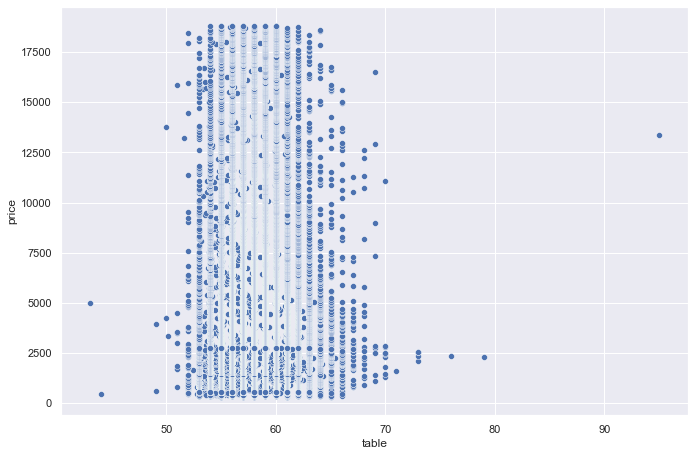

In [58]:
sns.scatterplot(data=df, x='table',y='price')

<AxesSubplot:xlabel='table', ylabel='price'>

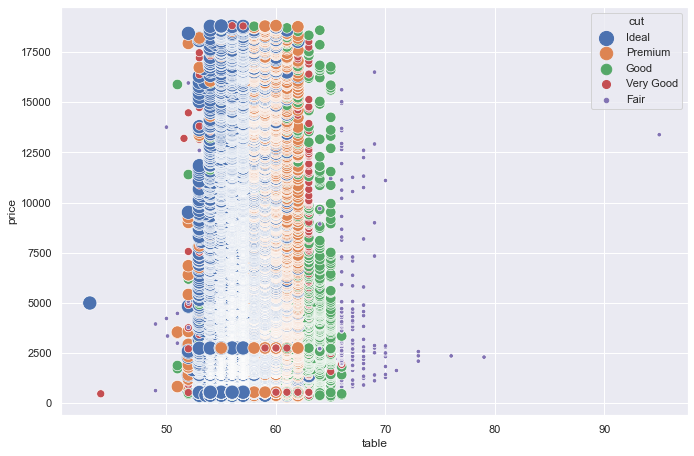

In [59]:
sns.set(rc={'figure.figsize':(10,7)})
sns.scatterplot(data=df, x='table', y='price', hue='cut', size='cut', 
               sizes=(20,200),legend='full')

#### Feature Engineering

In [60]:
df1 = df.copy()
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Label Encoding for cut Column

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [63]:
df1['cut'] = le.fit_transform(df1['cut'])
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [64]:
df1['cut'].value_counts(), df['cut'].value_counts()

(2    21551
 3    13793
 4    12083
 1     4906
 0     1610
 Name: cut, dtype: int64,
 Ideal        21551
 Premium      13793
 Very Good    12083
 Good          4906
 Fair          1610
 Name: cut, dtype: int64)

#### Onehot Encoding 

In [65]:
dummies_color = pd.get_dummies(df1['color'])
dummies_color.head(2)

,D,E,F,G,H,I,J
number,,,,,,,
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0


In [66]:
df1 = pd.concat([df1, dummies_color], axis=1)
df1.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,D,E,F,G,H,I,J
number,,,,,,,,,,,,,,,,,
1,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
2,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0


In [67]:
dummies_clarity = pd.get_dummies(df1['clarity'])
dummies_clarity.head(2)

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
number,,,,,,,,
1,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0


In [68]:
df1 = pd.concat([df1, dummies_clarity], axis=1)
df1.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
number,,,,,,,,,,,,,,,,,,,,,
1,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
2,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0


In [69]:
df1.shape

(53943, 25)

In [70]:
df2 = df1.drop(['color','clarity'], axis=1).copy()
df2.head(2)

,carat,cut,depth,table,price,x,y,z,D,E,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
number,,,,,,,,,,,,,,,,,,,,,
1,0.23,2,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,3,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0


In [71]:
df2.shape

(53943, 23)

In [72]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


#### Spliting Features and Target

In [73]:
x = df2.drop('price', axis=1)
y = df2['price']

#### Standard Scaler

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.19818918, -0.53814438, -0.17403335, ..., -0.54230403,
        -0.2695948 , -0.32194399],
       [-1.24038379,  0.4349097 , -1.36067623, ..., -0.54230403,
        -0.2695948 , -0.32194399],
       [-1.19818918, -1.51119847, -3.38494937, ..., -0.54230403,
        -0.2695948 , -0.32194399],
       ...,
       [-0.18551847,  0.4349097 , -0.87205857, ..., -0.54230403,
        -0.2695948 , -0.32194399],
       [-0.18551847,  0.4349097 , -1.36067623, ..., -0.54230403,
        -0.2695948 , -0.32194399],
       [-0.20661578,  1.40796378, -0.87205857, ...,  1.8439841 ,
        -0.2695948 , -0.32194399]])

In [77]:
y = np.array(y).reshape(-1,1)
y_scaled = scaler.fit_transform(y)
y_scaled

array([[-0.90410171],
       [-0.90410171],
       [-0.90385104],
       ...,
       [-0.29497252],
       [-0.29497252],
       [-0.29472185]])

#### Import Train, Test and Split Model

In [78]:
from sklearn.model_selection import train_test_split

#### Train, Test, Split 

In [79]:
# Train, Test and Split
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=1)

In [80]:
X_train.shape

(43154, 22)

In [81]:
X_test.shape

(10789, 22)

#### Linear Regression Model

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [85]:
# Predicting on Test and Train Data
pred_Y_test = lr.predict(X_test)
pred_Y_train = lr.predict(X_train)

#### Import Mean Squared Error Model

In [88]:
from sklearn.metrics import mean_squared_error

In [116]:
mean_squared_error(Y_test, pred_Y_test), mean_squared_error(Y_train, pred_Y_train)

(0.07846558220221966, 0.08171121391687555)

#### Other Way To Build Best Model

<AxesSubplot:>

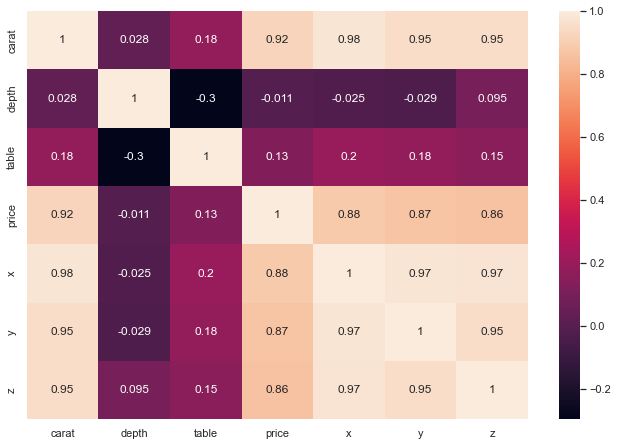

In [135]:
# Checking the correlation among features
sns.heatmap(df.corr(),annot=True)

In [93]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [94]:
# Creating new_df with highly correlated feature with price
new_df = df[['carat','x','y','z','price']]
new_df.head()

,carat,x,y,z,price
number,,,,,
1,0.23,3.95,3.98,2.43,326
2,0.21,3.89,3.84,2.31,326
3,0.23,4.05,4.07,2.31,327
4,0.29,4.20,4.23,2.63,334
5,0.31,4.34,4.35,2.75,335


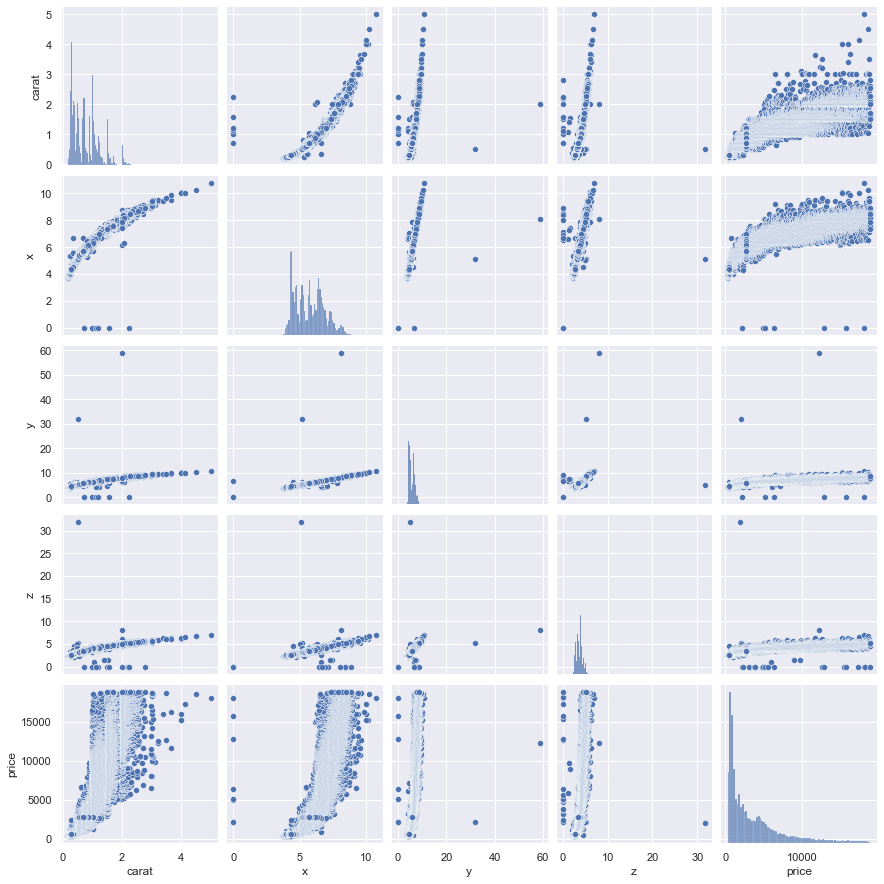

In [95]:
sns.pairplot(data=new_df)

In [96]:
new_df.head(2)

,carat,x,y,z,price
number,,,,,
1,0.23,3.95,3.98,2.43,326
2,0.21,3.89,3.84,2.31,326


In [97]:
# Spliting features and target variable
x = new_df.drop('price', axis=1)
y = new_df['price']

#### Importing Polynomial Features

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [99]:
poly = PolynomialFeatures(degree=2)

In [100]:
x_poly = poly.fit_transform(x)

In [101]:
x_poly

array([[ 1.    ,  0.23  ,  3.95  , ..., 15.8404,  9.6714,  5.9049],
       [ 1.    ,  0.21  ,  3.89  , ..., 14.7456,  8.8704,  5.3361],
       [ 1.    ,  0.23  ,  4.05  , ..., 16.5649,  9.4017,  5.3361],
       ...,
       [ 1.    ,  0.71  ,  5.79  , ..., 32.9476, 20.0326, 12.1801],
       [ 1.    ,  0.71  ,  5.74  , ..., 32.8329, 19.6539, 11.7649],
       [ 1.    ,  0.7   ,  5.71  , ..., 33.1776, 19.9872, 12.0409]])

In [104]:
x_poly.shape

(53943, 15)

In [106]:
# Scaling x_poly
x_poly_scaled = scaler.fit_transform(x_poly)
x_poly_scaled

array([[ 0.        , -1.19818918, -1.58788233, ..., -0.90250815,
        -1.3402572 , -1.06443299],
       [ 0.        , -1.24038379, -1.64137165, ..., -0.95635732,
        -1.4345205 , -1.14951964],
       [ 0.        , -1.19818918, -1.49873345, ..., -0.86687267,
        -1.37199604, -1.14951964],
       ...,
       [ 0.        , -0.18551847,  0.05245691, ..., -0.06106817,
        -0.12093017, -0.1257274 ],
       [ 0.        , -0.18551847,  0.00788248, ..., -0.06670984,
        -0.16549636, -0.18783706],
       [ 0.        , -0.20661578, -0.01886218, ..., -0.04975532,
        -0.12627294, -0.14655029]])

In [107]:
y.shape

(53943,)

In [108]:
y = np.array(y).reshape(-1,1)
y.shape

(53943, 1)

In [109]:
# Scaling y (target variable)
y_scaled = scaler.fit_transform(y)

In [110]:
# train, test and split
x_train, x_test, y_train, y_test = train_test_split(x_poly_scaled, y_scaled, test_size=0.2, random_state=1)

In [112]:
# Linear Regression Model
reg_model = LinearRegression()

In [113]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [114]:
# Predicting on train and test data
y1 = reg_model.predict(x_train)
y2 = reg_model.predict(x_test)

In [115]:
# Mean Squared Error
mean_squared_error(y_train, y1), mean_squared_error(y_test, y2)

(0.1268952449503373, 0.1283548309528001)

#### Support Vector Machine Algorithm

In [117]:
from sklearn.svm import SVR

In [118]:
svr_model = SVR()

In [119]:
svr_model.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [120]:
# Predicting on train and test data
y1_pred = svr_model.predict(x_train)
y2_pred = svr_model.predict(x_test)

In [121]:
# Mean Squared Error
mean_squared_error(y_train, y1_pred), mean_squared_error(y_test, y2_pred)

(0.12284218930337355, 0.12421337736920852)

#### Random Forest Algorithm

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
forest_model = RandomForestRegressor()

In [124]:
forest_model.fit(x_train, y_train)

C:\Users\dell\AppData\Local\Temp/ipykernel_972/4134266002.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(x_train, y_train)


RandomForestRegressor()

In [125]:
# Predicting on train and test data
y_train_pred = forest_model.predict(x_train)
y_test_pred = forest_model.predict(x_test)

In [126]:
# Mean Squared Error
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(0.02055866037495486, 0.12451115007767541)